In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


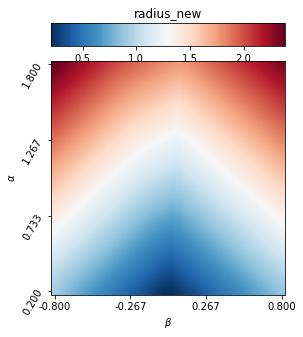

In [6]:
first_orders = np.linspace(0.2, 1.8, 34, endpoint=True)
second_orders = np.linspace(-0.8, 0.8, 34, endpoint=True)

n_reservoir = 100
sparsity = 0.4
spectral_radius = 1.
W = (np.random.rand(n_reservoir, n_reservoir) - 0.5) * 2  # [-1, 1]
W[np.random.rand(*W.shape) < sparsity] = 0
radius = np.max(np.abs(np.linalg.eigvals(W)))
W = W * (spectral_radius / radius)

radius_new = []
for a in first_orders:
    for b in second_orders:
        W_new = a * W + b * np.matmul(W, W)
        radius = np.max(np.abs(np.linalg.eigvals(W_new)))
        radius_new.append(radius)
radius_new = np.array(radius_new).reshape((len(first_orders), len(second_orders)))
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

im = ax.imshow(radius_new, cmap='RdBu_r', interpolation='gaussian')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='10%', pad=0.2)
fig.add_axes(cax)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')  # shrink=0.6,
cb.ax.set_title("radius_new")

x = len(first_orders)
y = len(second_orders)
yticks = np.linspace(0, x - 1, 4, endpoint=True, dtype=np.int8)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{data:.3f}' for data in first_orders[yticks]], rotation=60)
xticks = np.linspace(0, y - 1, 4, endpoint=True, dtype=np.int8)
ax.invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels([f'{data:.3f}' for data in second_orders[xticks]], )
ax.set_ylabel(r"$\alpha$")
ax.set_xlabel(r"$\beta$")
fig.savefig("./spectral.png", dpi=100)

In [7]:
W_max_prediction = 0.2 * W + -0.1 * np.matmul(W, W)
data = np.linalg.eigvals(W_max_prediction)

In [8]:
data

array([-2.74490893e-01+0.02044588j, -2.74490893e-01-0.02044588j,
       -1.52152978e-01+0.22418291j, -1.52152978e-01-0.22418291j,
       -5.14176511e-02+0.25980327j, -5.14176511e-02-0.25980327j,
       -2.07930791e-01+0.1191001j , -2.07930791e-01-0.1191001j ,
       -1.29241114e-01+0.18892889j, -1.29241114e-01-0.18892889j,
       -2.02547299e-01+0.09532953j, -2.02547299e-01-0.09532953j,
       -1.01747477e-02+0.2240632j , -1.01747477e-02-0.2240632j ,
       -1.99435502e-01+0.j        , -1.85947012e-01+0.06584935j,
       -1.85947012e-01-0.06584935j, -1.16607453e-01+0.14139686j,
       -1.16607453e-01-0.14139686j, -1.28417240e-02+0.18541708j,
       -1.28417240e-02-0.18541708j, -1.48680492e-01+0.j        ,
        1.10218542e-02+0.17577875j,  1.10218542e-02-0.17577875j,
       -8.98592799e-02+0.11909843j, -8.98592799e-02-0.11909843j,
       -1.18156084e-01+0.0729789j , -1.18156084e-01-0.0729789j ,
        5.61624485e-02+0.16216982j,  5.61624485e-02-0.16216982j,
       -8.48781191e-04+0.

In [9]:
data.shape

(100,)

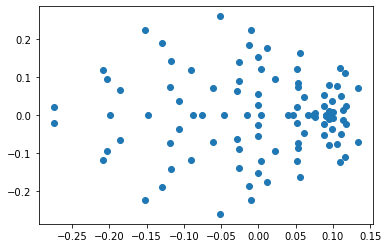

In [10]:
plt.scatter(np.real(data), np.imag(data), marker="o")